In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming image is your original image with shape (256, 256, 3)
colors = 13  # Number of colors to extract
image = cv2.imread("mask.jpg")
# Step 1: Flatten the image
flattened_image = image.reshape((-1, 3))

# Step 2: Apply K-means clustering
kmeans = KMeans(n_clusters=colors)
kmeans.fit(flattened_image)

# Step 3: Assign cluster labels
cluster_labels = kmeans.predict(flattened_image)
cluster_labels = cluster_labels.reshape((256, 256))

# Step 4: Reshape the image
converted_image = np.zeros((256, 256, colors), dtype=np.uint8)
for i in range(colors):
    converted_image[:, :, i] = (cluster_labels == i)

# Assuming composite_image is your image with shape (256, 256, 10)
composite_image = converted_image.astype(np.uint8)  # Convert to uint8 for visualization

# Display each channel separately
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    channel = composite_image[:, :, i]
    ax.imshow(channel)
    ax.axis('off')
    ax.set_title(f'Channel {i+1}')

plt.tight_layout()
plt.show()

In [ ]:
seg =  np.argmax(composite_image, axis=-1)

In [ ]:
seg.shape

In [ ]:
plt.imshow(seg)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image

# Load sample image (replace with your own image)
image = cv2.imread("mask.jpg")

# Convert image to floating point representation
image = np.array(image, dtype=np.float64) / 255

# Reshape the image to a 2D array of pixels
w, h, d = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))

# Shuffle the pixels to avoid spatial bias in k-means
image_array_sample = shuffle(image_array, random_state=0)[:1000]

# Perform k-means clustering
n_colors = 8  # Number of clusters
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

# Create a new image where each pixel is replaced by its corresponding cluster centroid
quantized_image = np.zeros_like(image)
for i in range(w):
    for j in range(h):
        quantized_image[i, j] = kmeans.cluster_centers_[labels[i * h + j]]

# Plot the original image and the quantized image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(quantized_image)
ax[1].axis('off')
ax[1].set_title('Quantized Image with {} colors'.format(n_colors))

plt.tight_layout()
plt.show()

In [ ]:
quantized_image.shape

In [8]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2

# Step 2: Load the image
image = cv2.imread('mask.jpg')

# Step 3: Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Step 4: Perform k-means clustering
K = 100  # Number of clusters
kmeans = KMeans(n_clusters=K)
kmeans.fit(pixels)
labels = kmeans.labels_

# Step 5: Reshape the labels array back to the original image shape
labels = labels.reshape(image.shape[:2])

# Step 6: Get unique labels and their counts
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Step 7: Create the output array with shape (width, height, labels)
output = np.zeros((*image.shape[:2], K))
for label in unique_labels:
    output[..., label] = (labels == label).astype(int)

# Step 8: Print the shape of the output
print(output.shape)  # (width, height, labels)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(256, 256, 100)


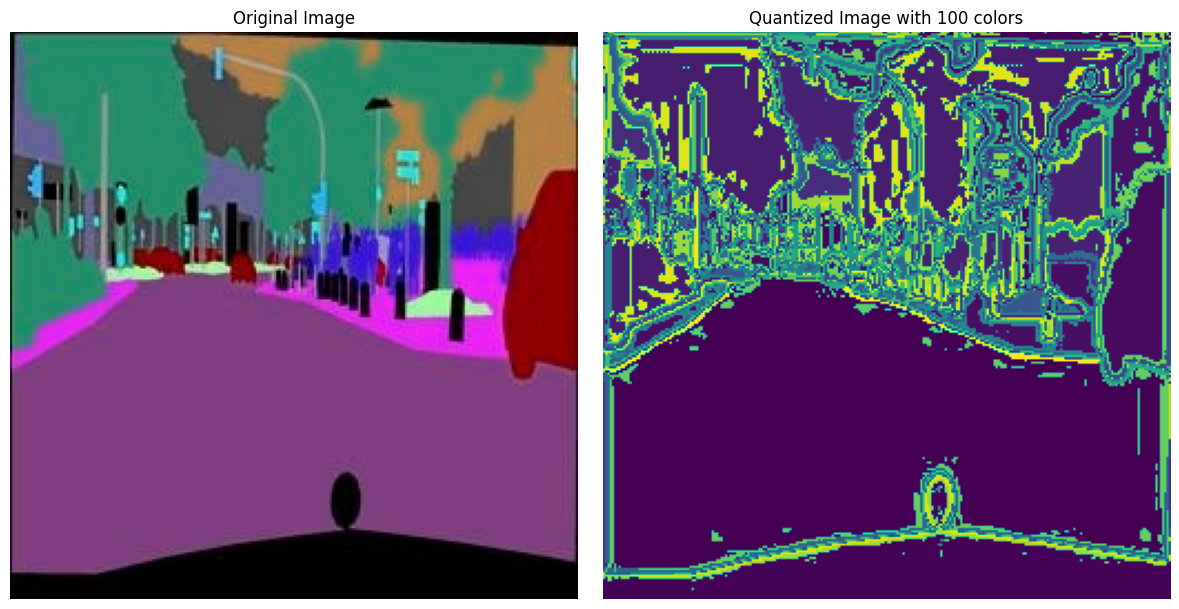

In [9]:
# Plot the original image and the quantized image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(np.argmax(output, axis=-1))
ax[1].axis('off')
ax[1].set_title('Quantized Image with {} colors'.format(K))

plt.tight_layout()
plt.show()

In [20]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the image
image = cv2.imread('mask.jpg')

# Step 3: Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Step 4: Convert the pixel values from BGR to RGB format
pixels_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 5: Create a color palette using Seaborn
colors = pixels_rgb.reshape(-1, 3)
unique_colors = np.unique(colors, axis=0)
color_palette = sns.color_palette('colorblind', len(unique_colors))

# Step 6: Plot the color palette
sns.palplot(color_palette)
plt.show()

ValueError: Image size of 1898900x100 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1.8989e+06x100 with 1 Axes>